In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")
%matplotlib inline

#absolute path
df1 = pd.read_csv('/home/jovyan/work/Datasets/EU_RenewableEng_Prod_05-16.csv')
df2 = pd.read_csv('/home/jovyan/work/Datasets/EU_EngConsPerCap_00-16.csv')

In [51]:
df1.head()

,Year,Country,Units,Product,Indicator,Value
0,2005,Albania,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,694.3
1,2005,Austria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,7000.5
2,2005,Bosnia and Herzegovina,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,0.0
3,2005,Belgium,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,874.8
4,2005,Bulgaria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,1123.8


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 6 columns):
Year         6720 non-null int64
Country      6720 non-null object
Units        6720 non-null object
Product      6720 non-null object
Indicator    6720 non-null object
Value        6720 non-null object
dtypes: int64(1), object(5)
memory usage: 315.1+ KB


In [58]:
df1['Value']= df1['Value'].str.replace(':', '0')

In [59]:
df1['Value'] = df1['Value'].astype(float)

In [149]:
df1_total = df1[df1['Product'] == 'Renewable energies']

In [151]:
df1_byprod = df1[df1['Product'] != 'Renewable energies']

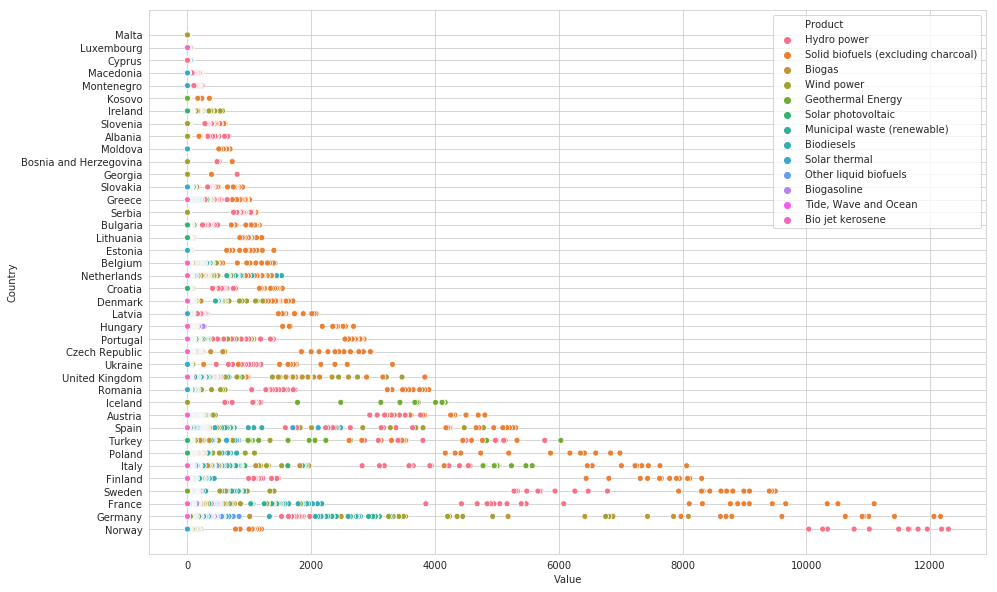

In [154]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10
sns.scatterplot(x='Value', y='Country',hue='Product', data=df1_byprod.sort_values(by='Value', ascending=False));
#remove the total renewable energies

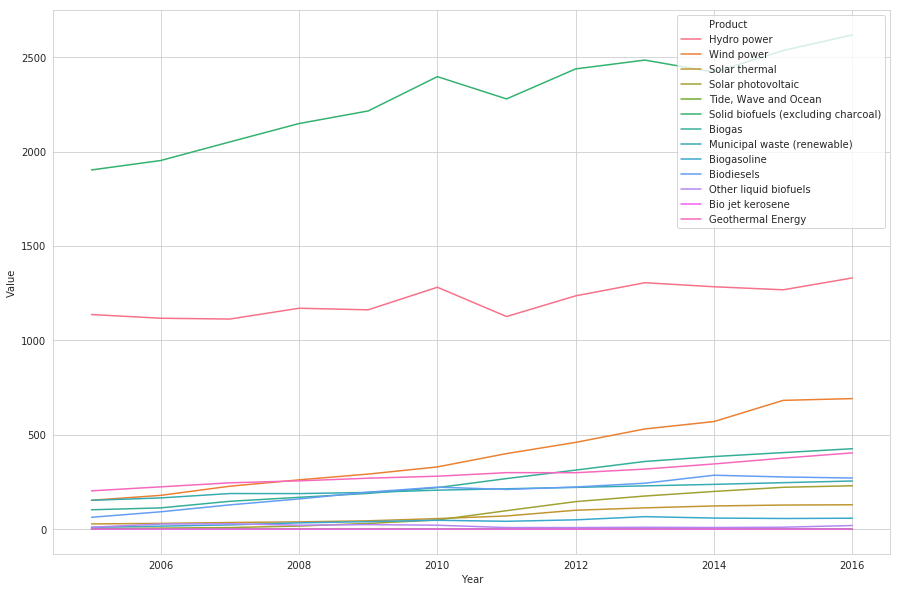

In [155]:
sns.lineplot(x='Year', y='Value', data=df1_byprod, hue='Product', ci=None);

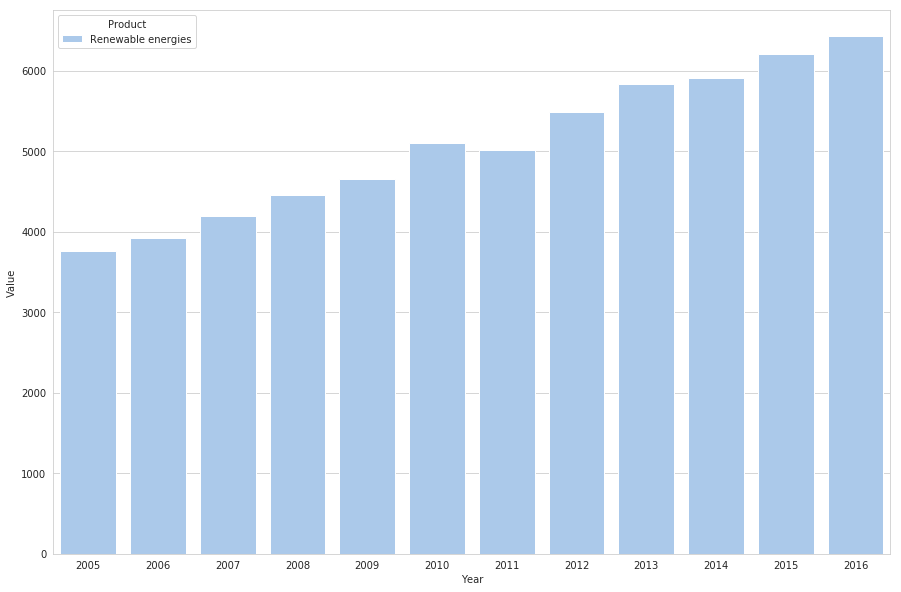

In [157]:
sns.barplot(x='Year', y='Value', data=df1_total, hue='Product');

In [132]:
df1.groupby('Country')['Value'].sum().sort_values().tail(15)

Country
Netherlands        80849.2
Iceland           107286.4
Portugal          118723.0
Romania           129605.4
Poland            165609.2
United Kingdom    169848.5
Austria           203767.8
Finland           224855.6
Turkey            283536.8
Norway            302423.9
Spain             327241.0
Sweden            389572.2
Italy             469630.9
France            471642.9
Germany           689807.6
Name: Value, dtype: float64

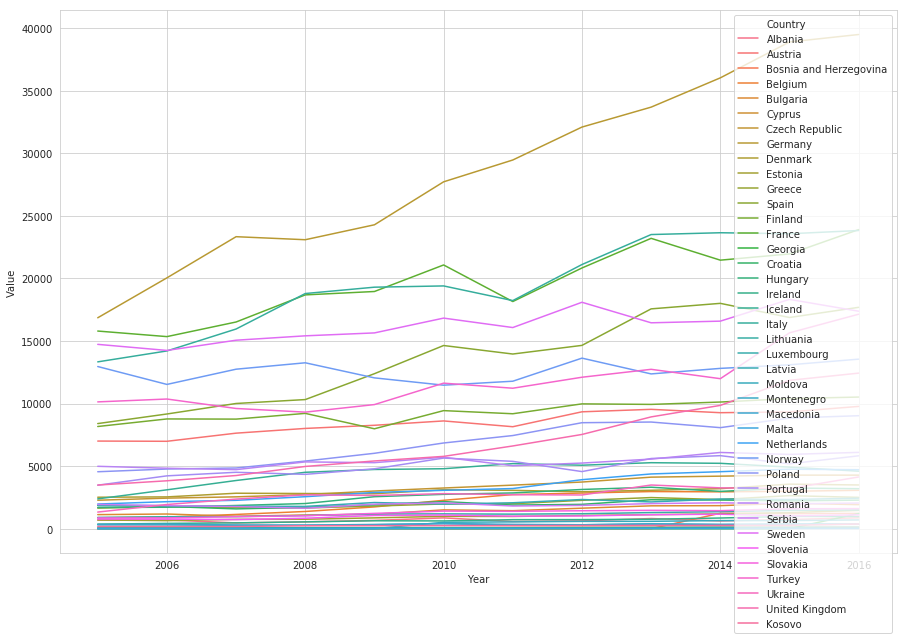

In [158]:
sns.lineplot(x='Year', y='Value', data=df1_total, hue='Country', ci=None);
#how to select the top 10/15?

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 3 columns):
Year                               629 non-null int64
kg of oil equivalent per capita    629 non-null object
Country                            629 non-null object
dtypes: int64(1), object(2)
memory usage: 14.8+ KB


In [96]:
df2['kg of oil equivalent per capita']= df2['kg of oil equivalent per capita'].str.replace(':', '0')
df2['kg of oil equivalent per capita']= df2['kg of oil equivalent per capita'].str.replace('p', '')
df2['kg of oil equivalent per capita']= df2['kg of oil equivalent per capita'].str.replace('b', '')
df2['kg of oil equivalent per capita']= df2['kg of oil equivalent per capita'].str.replace('e', '')

In [97]:
df2['kg of oil equivalent per capita']= df2['kg of oil equivalent per capita'].astype(float)

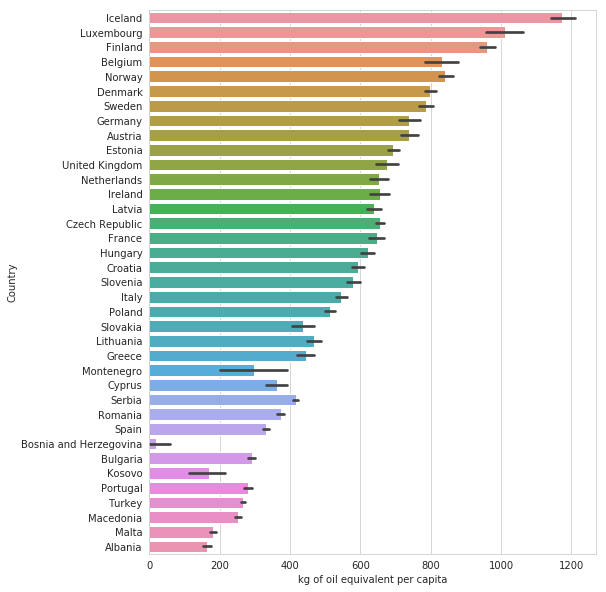

In [139]:
plt.rcParams['figure.figsize'] = (8,10)
plt.rcParams['font.size'] = 10
sns.barplot(y='Country', x='kg of oil equivalent per capita', data=df2.sort_values(by='kg of oil equivalent per capita', ascending=False));

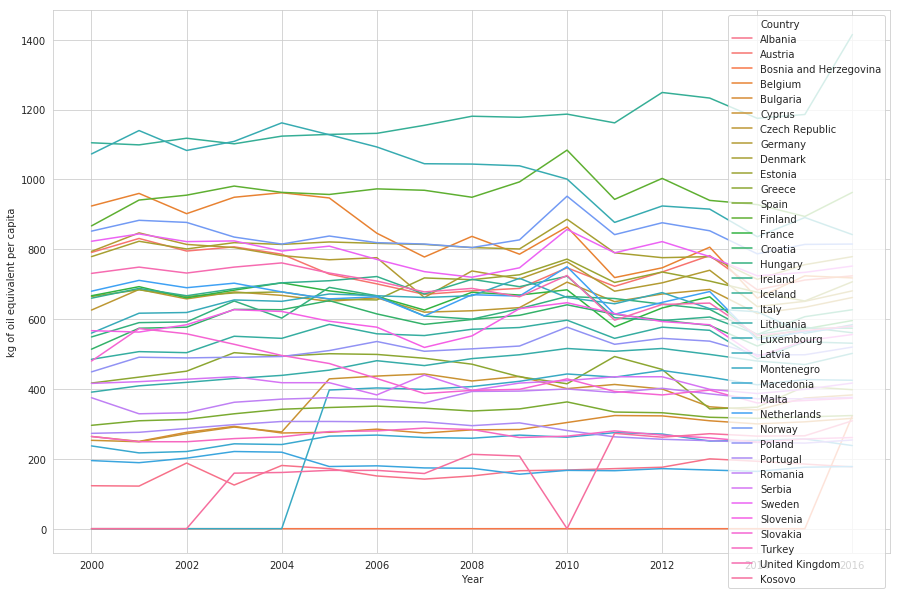

In [127]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10
sns.lineplot(
    x='Year', y='kg of oil equivalent per capita', 
             data=df2, hue='Country', ci=None);
# do a map 2005 vs 2016

In [43]:
result = pd.concat([df1, df2], sort=False)

In [44]:
result.head()

,Year,Country,Units,Product,Indicator,Value,kg of oil equivalent per capita
0,2005,Albania,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,694.3,NaN
1,2005,Austria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,7000.5,NaN
2,2005,Bosnia and Herzegovina,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,0.0,NaN
3,2005,Belgium,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,874.8,NaN
4,2005,Bulgaria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,1123.8,NaN


In [45]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7349 entries, 0 to 628
Data columns (total 7 columns):
Year                               7349 non-null int64
Country                            7349 non-null object
Units                              6720 non-null object
Product                            6720 non-null object
Indicator                          6720 non-null object
Value                              6720 non-null object
kg of oil equivalent per capita    629 non-null object
dtypes: int64(1), object(6)
memory usage: 459.3+ KB


In [46]:
result['Product'].value_counts()

Municipal waste (renewable)            480
Solar thermal                          480
Biogas                                 480
Renewable energies                     480
Tide, Wave and Ocean                   480
Other liquid biofuels                  480
Biodiesels                             480
Geothermal Energy                      480
Biogasoline                            480
Hydro power                            480
Wind power                             480
Solar photovoltaic                     480
Bio jet kerosene                       480
Solid biofuels (excluding charcoal)    480
Name: Product, dtype: int64